# Modeling Video Game Popularity

In the previous notebook we looked at several data sets, to determine threshold values and ways to determine popularity. After noting which datasets lacked sufficient information and what datasets we could combine, we have settled on 3 sets to model with. The one we will be looking at is the 2019 Steam Tag data, the other two will be for personal curiosity to see if we get significantly different results. These two additional sets will be the 2019 Video Game Sales data and the Merged data set, they will not be ran in this notebook but could easily be switched in if desired.

#### Things to note that have been done:

- Dropped columns that were not independent variables (Ie. an individual does not have control over these when designing the game) other than the variable we chose to determine popularity (Rating).
- Created dummy variables of categorical values
- Train_test_split:
 - We chose our dependent variable to be categorical of Popularity, which is determined by if a game achieved more than 70% rating
 
#### What we will be doing in this notebook: 

Selecting a model that works best to predict the popularity of a game, and thus informing us as to what features are most important to have in our games. We will be looking at Logistic Regression, K-Nearest Neighbors, Support vector Machines, and Random Forests.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve

import warnings
warnings.filterwarnings('ignore')

## Loading Training data:

In [2]:
x_train = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/preprocessed_data/x_steam_train.csv", index_col=0)
y_train = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/preprocessed_data/y_steam_train.csv", index_col=0)

x_test = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/preprocessed_data/x_steam_test.csv", index_col=0)
y_test = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/preprocessed_data/y_steam_test.csv", index_col=0)


In [3]:
x_train

,english,required_age,achievements,median_playtime,price,1980s,1990s,2.5d,2d,2d_fighter,...,developer_azimut team,developer_b-alive gmbh,developer_baKno Games,developer_e-FunSoft Games,developer_ebi-hime,developer_hallunazigames,developer_id Software,developer_stariy8419,developer_upjers,developer_vadimalexepta
0,0.139753,-0.150294,-0.092509,-0.026596,-0.117288,-0.014531,0.0,-0.012584,-0.065521,-0.028147,...,-0.020552,-0.025173,-0.022978,-0.019224,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978
1,0.139753,-0.150294,-0.127883,0.031470,-0.676471,-0.014531,0.0,-0.012584,-0.065521,-0.028147,...,-0.020552,-0.025173,-0.022978,-0.019224,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978
2,0.139753,-0.150294,-0.127883,0.047384,-0.562093,-0.014531,0.0,-0.012584,-0.065521,-0.028147,...,-0.020552,-0.025173,-0.022978,-0.019224,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978
3,0.139753,-0.150294,-0.127883,-0.062726,0.111469,-0.014531,0.0,-0.012584,-0.065521,-0.028147,...,-0.020552,-0.025173,-0.022978,-0.019224,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978
4,0.139753,-0.150294,-0.127883,-0.062726,1.191710,-0.014531,0.0,-0.012584,-0.065521,-0.028147,...,-0.020552,-0.025173,-0.022978,-0.019224,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18944,0.139753,-0.150294,-0.127883,-0.062726,0.683361,-0.014531,0.0,-0.012584,-0.065521,-0.028147,...,-0.020552,-0.025173,-0.022978,-0.019224,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978
18945,0.139753,-0.150294,0.850811,-0.062726,-0.574802,-0.014531,0.0,-0.012584,-0.065521,-0.028147,...,-0.020552,-0.025173,-0.022978,-0.019224,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978
18946,0.139753,-0.150294,-0.127883,-0.058855,-0.776870,-0.014531,0.0,-0.012584,-0.065521,-0.028147,...,-0.020552,-0.025173,-0.022978,-0.019224,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978
18947,0.139753,-0.150294,-0.127883,-0.062726,-0.676471,-0.014531,0.0,-0.012584,-0.065521,-0.028147,...,-0.020552,-0.025173,-0.022978,-0.019224,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978


In [4]:
print(x_train.shape)
print(y_train.shape)

(18949, 1476)
(18949, 1)


### I. Logistic Regression

In [5]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(x_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(x_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,C_parameter,Accuracy
0,0.001,0.663383
1,0.010,0.663383
2,0.100,0.662645
3,1.000,0.662522
4,10.000,0.662645
5,100.000,0.662645


In [6]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(x_test,y_test)

print(Accuracy_lr)

[[1233 2034]
 [ 706 4149]]
0.662644668800788


Looks like our accuracy for a linear regression is 0.67 no matter what our parameter is set to.

In [7]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(Logreg,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.66038511 0.63464555 0.65897001 0.64327362 0.6604328 ]
Mean cross validation test score: 0.6515414163038555
Mean cross validation train score: 0.692405285464609
Standard deviation in cv test scores: 0.010642166000272322


## II. K-Nearest Neighbor (KNN):

[[1521 1746]
 [1173 3682]]
0.6406057621275548


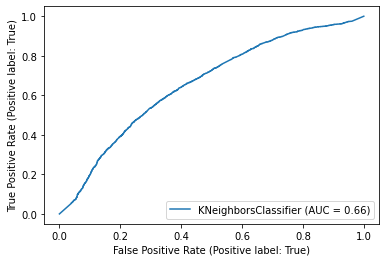

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(x_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(x_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(x_test,y_test)

print(Accuracy_knn)
knn_disp= plot_roc_curve(knn,x_test,y_test)

In [9]:
cv_scores_test= cross_val_score(knn,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.62981982 0.61249398 0.62766949 0.62426052 0.65845586]
Mean cross validation test score: 0.630539934770757
Mean cross validation train score: 0.6559276061532836
Standard deviation in cv scores: 0.015186472216413739


## III. Support Vector Machine (SVM):

In [10]:
from sklearn.svm import SVC

# svm = SVC(kernel='linear')
# svm.fit(x_train, y_train)

# # Predict using model:

# y_predict_svm=svm.predict(x_test)

# #Confusion matrix:

# cnf_matrix = confusion_matrix(y_test, y_predict_svm)
# print(cnf_matrix)

# Accuracy_svm=svm.score(x_test,y_test)
# print(Accuracy_svm)

In [11]:
# cv_scores_test= cross_val_score(svm,x_test,y_test,cv=5,scoring='roc_auc')
# cv_scores_train= cross_val_score(svm,x_train,y_train,cv=5,scoring='roc_auc')
# print(cv_scores_test)
# cv_scores_svm_test= cv_scores_test.mean()
# cv_scores_svm_train= cv_scores_train.mean()
# cv_scores_std_svm= cv_scores_test.std()
# print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
# print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
# print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

The SVM cells took too long for my computer to run. Here is the Accuracy_smv results. The computer could not handle cross validation:

[[ 962 2303]

 [ 435 4422]]

0.6628909135680867

## IV. Random Forest:

In [12]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(x_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(x_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(x_test,y_test)
print(Accuracy_rf)

[[1599 1668]
 [1212 3643]]
0.6454075350898794


In [13]:
cv_scores_test= cross_val_score(rf,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.66861223 0.62895058 0.66235059 0.65010259 0.67000361]
Mean cross validation test score: 0.6560039196463953
Mean cross validation train score: 0.6804553150267598
Standard deviation in cv scores: 0.015244344299003499


## V. Naive Bayes:

In [14]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(x_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(x_test,y_test)
print(Accuracy_nb)

[[3082  185]
 [4079  776]]
0.47500615611918245


In [15]:
cv_scores_test= cross_val_score(nb,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.5602078  0.55943383 0.55692337 0.54677217 0.56466077]
Mean cross validation test score: 0.5575995848935047
Mean cross validation train score: 0.5619656797892101
Standard deviation in cv scores: 0.005961841793860642


## VI. Gradient Boost:

In [16]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(x_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(x_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(x_test,y_test)
print(Accuracy_gbc)

[[1330 1937]
 [ 805 4050]]
0.6623984240334893


In [17]:
cv_scores_test= cross_val_score(gbc,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.67944787 0.64670396 0.68877225 0.67486906 0.69973567]
Mean cross validation test score: 0.6779057622270732
Mean cross validation train score: 0.7137955362340981
Standard deviation in cv scores: 0.017775139774479295


Taken from the mean cross validation score:

- Logistic Regression: 0.6515
- K-Nearest Neighbors: 0.6305
- Random Forest: 0.6568
- Naive Bayes: 0.5575
- Gradient Boost: 0.6779

## Model comparison:

In [18]:
myLabels = [ 'Logistic Regression','KNN','Random Forest', 'Naive Bayes', 'Gradient Boost']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_rf_test,cv_scores_nb_test, cv_scores_gbc_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_rf_train,cv_scores_nb_train, cv_scores_gbc_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_rf,Accuracy_nb, Accuracy_gbc]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.662645
1                  KNN              0.640606
2        Random Forest              0.645408
3          Naive Bayes              0.475006
4       Gradient Boost              0.662398


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.692405,0.651541
1,KNN,0.655928,0.630540
2,Random Forest,0.680455,0.656004
3,Naive Bayes,0.561966,0.557600
4,Gradient Boost,0.713796,0.677906


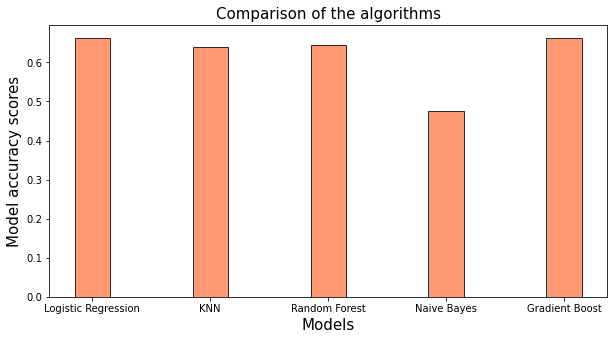

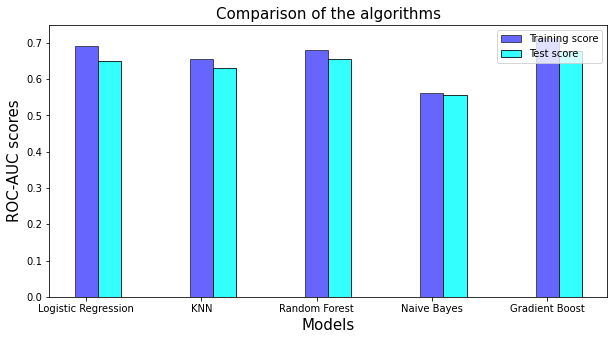

In [19]:
#plotting the accuracy scores:


index=[1,2,3,4,5]
index_acc=[1,2,3,4,5]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4, 5], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5]
index_acc=[1.2,2.2,3.2,4.2, 5.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5], myLabels)
plt.legend()
plt.savefig("27.png")
plt.show()

Our two best performing models are Random Forest and Gradient Boost (Gradient Boost being the better of the two). So lets work on fine tuning them:

## Hyperparameter Tuning using Grid search CV:

### Random Forest:

In [20]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(x_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(criterion='entropy', min_samples_split=12, n_jobs=-1,
                       random_state=1)
0.6740725531652595


In [21]:

rf = RandomForestClassifier(min_samples_split=16, n_estimators=1000, n_jobs=-1,
                       random_state=1)
rf.fit(x_train, y_train)
y_predictions_rf = rf.predict(x_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, x_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.6678158089140606
0.6859372744103738


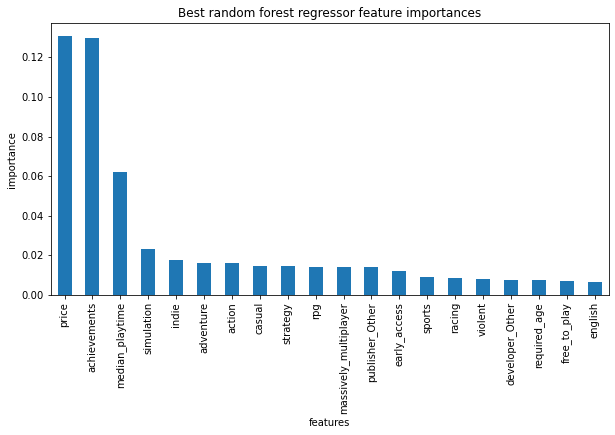

In [22]:
plt.subplots(figsize=(10, 5))
imps = rf.feature_importances_
rf_feat_imps = pd.Series(imps, index=x_train.columns).sort_values(ascending=False)
rf_feat_imps[:20].plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [23]:

from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(x_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7059833424593278


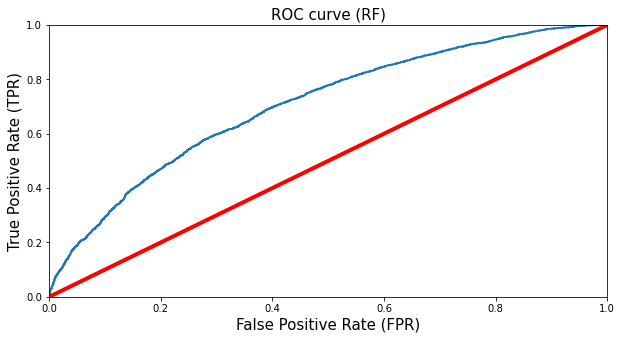

In [24]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

### Gradient boost

In [25]:
GB = GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(x_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=200)
0.6673172729149931


In [26]:

GB= GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=200)
GB.fit(x_train, y_train)
y_predictions_GB = GB.predict(x_test)
acc_GB = accuracy_score(y_test, y_predictions_GB)
cv_GB = cross_val_score(GB, x_test, y_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

0.6623984240334893
0.6717180798861472


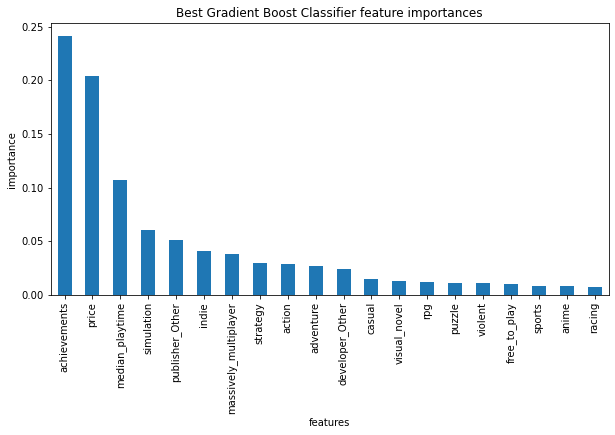

In [27]:
plt.subplots(figsize=(10, 5))
imps = GB.feature_importances_
gb_feat_imps = pd.Series(imps, index=x_train.columns).sort_values(ascending=False)
gb_feat_imps[:20].plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best Gradient Boost Classifier feature importances');

In [28]:
y_scores_gb = GB.predict_proba(x_test)
y_scores_gb = y_scores_gb[:,1]
auroc = roc_auc_score(y_test, y_scores_gb)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.695145475287784


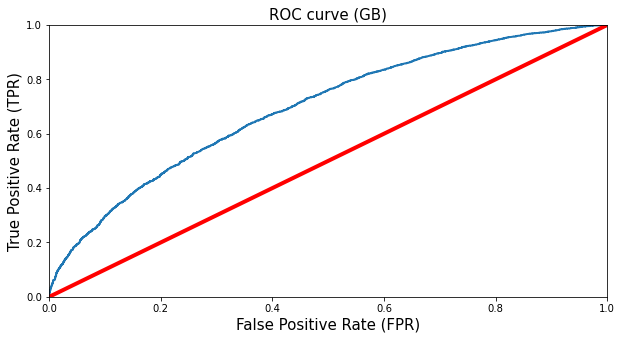

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_gb)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("31.png")
plt.show()

# Conclusion:

We looked at the following classification models:
- Logistic Regression
- K-Nearest Neighbor
- Support Vector Machine (Removed from Steam Tags, because of run time)
- Random Forest
- Naive Bayes
- Gradient Boost

We worked with cross-validation on the training set to help avoid overfitting.

### Steam Tags:

In steam tags we saw that Gradient Boost and Random Forest performed the best, so we then performed a Grid Seach to fine tune the hyper parameters. When using the Steam Tags data set this does take quiet a bit of time to run, So here is a quick over view of the results:
#### Random Forest:
     - ROC-AUC Score = 0.7060
     - Top Features:
         achievements, 
         price, 
         median_playtime, 
         simulation, 
         indie, 
         adventure, 
         action, 
         casual, 
         strategy, 
         publisher_Other, 
         rpg, 
         massively_multiplayer, 
         early_access, 
         sports, 
         violent, 
         racing, 
         required_age, 
         developer_Other, 
         english, 
         free_to_play

Some conclusions we can pull from this list of features:
#### achievement:
players enjoy a sense of accomplishment as they progress through a game, adding mile stones or easter egg achievements to reward the player is good.
#### price: 
check for competitive pricing of the type of game we are creating, in EDA we saw that most games are less than \\$20, but with games between 16-50 hours of playtime (recommended) we saw we could charge up to \\$40. 
However also note our last feature is free_to_play, this could suggest that a lower price is better, and if we have an alternate form of profit, ftp is a valid choice.
#### median_playtime: 
we also saw this appear in EDA, I would recommend making that target play times between 16-50 hours.
#### genre:
simulation, indie, adventure, action, strategy, rpg, sports, racing. These all showed up in our EDA search picking a genre in this categories will be solid choices.
#### publisher and developer: Other
This was interesting to see. I would hypothesize that this is because bigger name companies have a higher expectation of achievement, and so it's easier to make a popular game with a smaller company. So if the client is a newer game maker, tryng to work with a smaller company is the way to go.
#### Features:
- massively multiplayer: players want to play agianst/with other players
- early_access: this can help with advertising, getting Twitch streamers to play the game in early access so people can see what game play is like.
- violent: This could be graphics for combat sequences or the amount of combat in the game.
- required_age: while some games that are rated E are popular, we saw more Mature and Teen content selling better.
- english: having an english dubbed version if the game isn't already in english can help sales.

#### Gradient Boost:
 - ROC-AUC Score: 0.6951
 - Top Features (different from Random Forest): visual novel, puzzle, anime. These were just 3 more genres we could consider
 
 Based on the ROC-AUC score I would recommend the Random Forest method

# Future Action:

- We may want to narrow the focus to just modern games to see how players have changed.
- Possibly using fewer features as we may be overfitting, however we did attempt to remove redundant information in our preprocessing notebook.
- We can edit the notebooks for different parameters we'd wish to change, such as determining popularity on sales instead of rating, or looking at a different set of data.
- In preprocessing we made 2 other data sets we could run through this notebook to see if they produce different outcomes, they are smaller sets and could possibly help with runtime.